In [1]:
import pandas as pd
import os
from glob import glob

# Define the directory containing the CSV files
directory = 'D:/ANALYTICS/COD/bp_data/players'

# Get a list of all CSV files in the directory
csv_files = glob(os.path.join(directory, '*.csv'))

# Read each CSV file into a DataFrame and concatenate them into a single DataFrame
player_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Display the combined DataFrame
print(player_data.head())

                                     id                               game_id  \
0  0cc62aed-5797-43ba-9174-95a3b5478911  ab321cb4-7d55-432c-a00b-14b7ae838422   
1  bc4b5bbd-9517-4dfc-8bd7-f08e5b4d25d6  ab321cb4-7d55-432c-a00b-14b7ae838422   
2  34451653-58b0-4724-8d2f-9a884a9c19af  ab321cb4-7d55-432c-a00b-14b7ae838422   
3  9101b8df-2c7b-47ec-8d46-00f344c06ce2  ab321cb4-7d55-432c-a00b-14b7ae838422   
4  ac3398c5-2927-4767-a6fd-e2ff3b2fae17  ab321cb4-7d55-432c-a00b-14b7ae838422   

   player_id player_tag  stats                created_at  \
0          2      aBeZy    NaN  2023-12-15T19:49:46.542Z   
1         35    SlasheR    NaN  2024-02-16T20:52:34.190Z   
2          8    Cellium    NaN  2023-12-15T19:49:46.542Z   
3         12     Drazah    NaN  2023-12-15T19:49:46.542Z   
4         29       Simp    NaN  2023-12-15T19:49:46.542Z   

                 updated_at  deleted_at  match_id  kills  ...  hp_bp_rating  \
0  2023-12-15T19:49:46.542Z         NaN     27193     18  ...           0

In [7]:
player_data.columns

Index(['id', 'game_id', 'player_id', 'player_tag', 'stats', 'created_at',
       'updated_at', 'deleted_at', 'match_id', 'kills', 'deaths', 'damage',
       'team_id', 'assists', 'non_traded_kills', 'highest_streak', 'hill_time',
       'contested_hill_time', 'first_blood_count', 'plant_count',
       'defuse_count', 'zone_capture_count', 'zone_tier_capture_count',
       'spreadsheet_identifier', 'first_death_count', 'snipe_count',
       'one_v_one_win_count', 'one_v_two_win_count', 'one_v_three_win_count',
       'one_v_four_win_count', 'snd_rounds', 'gametime_min', 'gametime_sec',
       'event_id', 'mode_id', 'datetime', 'map_id', 'event_type', 'season_id',
       'hp_bp_rating', 'snd_bp_rating', 'ctl_bp_rating', 'bp_rating',
       'ctl_attack_rounds', 'ctl_defense_rounds', 'document.id', 'game_no',
       'player_no', 'start_date'],
      dtype='object')

In [4]:
## create a filtered dataframe with mode_id = 1
player_data_filtered = player_data[player_data['mode_id'] == 1]

In [8]:
# ...existing code...

import pandas as pd

def calculate_stats(df):
    # Calculate Traded Kills
    df['traded_kills'] = df['kills'] - df['non_traded_kills']

    # Calculate Traded Deaths and Non-Traded Deaths
    df['opponents_traded_kill_pct'] = df.apply(lambda row: df[df['team_id'] != row['team_id']]['traded_kills'].sum() / df[df['team_id'] != row['team_id']]['kills'].sum(), axis=1)
    df['traded_deaths'] = df['opponents_traded_kill_pct'] * df['deaths']
    df['non_traded_deaths'] = df['deaths'] - df['traded_deaths']

    # Calculate Assists on NTKs and TKs
    df['teammate_ntk_pct'] = df.apply(lambda row: (df[(df['team_id'] == row['team_id']) & (df['player_tag'] != row['player_tag'])]['non_traded_kills'].sum()) / (df[(df['team_id'] == row['team_id']) & (df['player_tag'] != row['player_tag'])]['kills'].sum()), axis=1)
    df['assists_on_ntks'] = df['assists'] * df['teammate_ntk_pct']
    df['assists_on_tks'] = df['assists'] - df['assists_on_ntks']

    # Calculate Kills with and without Assists
    df['kills_assisted_pct'] = df.apply(lambda row: df[(df['team_id'] == row['team_id']) & (df['player_tag'] != row['player_tag'])]['assists'].sum() / 3 / row['kills'], axis=1)
    df['tk_with_assists'] = df['traded_kills'] * df['kills_assisted_pct']
    df['tk_without_assists'] = df['traded_kills'] - df['tk_with_assists']
    df['ntk_with_assists'] = df['non_traded_kills'] * df['kills_assisted_pct']
    df['ntk_without_assists'] = df['non_traded_kills'] - df['ntk_with_assists']

    # Calculate Effective Kills
    df['effective_kills'] = df['ntk_with_assists'] * 1 * 0.50 + \
        df['ntk_without_assists'] * 1 + \
        df['tk_with_assists'] * 0.23 * 0.50 + \
        df['tk_without_assists'] * 0.23 + \
        df['assists_on_ntks'] * 1 * 0.50 + \
        df['assists_on_tks'] * 0.23 * 0.50
        
    # Calculate Effective Deaths
    df['effective_deaths'] = 0.23 * df['traded_deaths'] + 1 * df['non_traded_deaths']

    return df

# Assuming player_data_filtered is already defined and loaded
player_data_filtered = player_data_filtered.groupby('game_id').apply(calculate_stats).reset_index(drop=True)

# Display the updated DataFrame
player_data_filtered.head()

,id,game_id,player_id,player_tag,stats,created_at,updated_at,deleted_at,match_id,kills,...,teammate_ntk_pct,assists_on_ntks,assists_on_tks,kills_assisted_pct,tk_with_assists,tk_without_assists,ntk_with_assists,ntk_without_assists,effective_kills,effective_deaths
0,201bb9a0-261e-422b-b715-d3a56657bde8,00b48d08-be21-43b9-8f37-130c25ed913a,45,FelonY,NaN,2024-02-16T20:14:40.998Z,2024-02-16T20:14:40.998Z,NaN,27231,17,...,0.691358,6.913580,3.086420,0.411765,1.647059,2.352941,5.352941,7.647059,14.865846,14.927059
1,9abdd49f-de26-4537-bd46-7fb2875453a4,00b48d08-be21-43b9-8f37-130c25ed913a,2,aBeZy,NaN,2024-01-21T01:37:20.293Z,2024-01-21T01:37:20.293Z,NaN,27231,21,...,0.609375,4.265625,2.734375,0.269841,0.809524,2.190476,4.857143,13.142857,18.615599,16.215000
2,dc18c29a-56b8-4c7f-8852-db744ead798e,00b48d08-be21-43b9-8f37-130c25ed913a,101,Gwinn,NaN,2024-01-21T01:37:20.293Z,2024-01-21T01:37:20.293Z,NaN,27231,24,...,0.689189,8.270270,3.729730,0.263889,1.583333,4.416667,4.750000,13.250000,21.386971,16.419765
3,8c3a48bc-0737-4c66-8d27-79643463cca3,00b48d08-be21-43b9-8f37-130c25ed913a,30,TJHaLy,NaN,2024-01-21T01:37:20.293Z,2024-01-21T01:37:20.293Z,NaN,27231,26,...,0.694444,3.472222,1.527778,0.333333,2.333333,4.666667,6.333333,12.666667,19.086806,14.927059
4,3d63dc4f-20bd-4aac-9d25-a0cf30935a9c,00b48d08-be21-43b9-8f37-130c25ed913a,8,Cellium,NaN,2024-01-21T01:37:20.293Z,2024-01-21T01:37:20.293Z,NaN,27231,17,...,0.705882,3.529412,1.470588,0.372549,2.980392,5.019608,3.352941,5.647059,10.754608,20.075714


In [11]:
# Create a new DataFrame with the specified columns
summary_df = player_data_filtered[['player_tag', 'kills', 'deaths', 'game_id', 'effective_kills', 'effective_deaths', 'gametime_min', 'gametime_sec']]

## get gametime_sec in seconds
summary_df['gametime'] = summary_df['gametime_min'] * 60 + summary_df['gametime_sec']

# Group by player_tag and aggregate the data
summary_df = summary_df.groupby('player_tag').agg({
    'kills': 'sum',
    'deaths': 'sum',
    'game_id': 'nunique',
    ## gametime = sum(gametime_min * 60 + gametime_sec)
    'gametime': 'sum',
    'effective_kills': 'sum',
    'effective_deaths': 'sum'
}).reset_index()

# man_advantage_per_10min = (effective_kills - effective_deaths) / (gametime / 600)
summary_df['man_advantage_per_10min'] = (summary_df['effective_kills'] - summary_df['effective_deaths']) / (summary_df['gametime'] / 600)

# Rename the columns
summary_df.rename(columns={'game_id': 'games'}, inplace=True)

# Display the new DataFrame
print(summary_df.head())

  player_tag  kills  deaths  games  gametime  effective_kills  \
0         04    879     974     37     23060       644.580028   
1     Abuzah   1517    1535     69     42125      1131.480381   
2   Accuracy   1150    1322     57     34829       854.100337   
3       Afro    558     661     29     18086       407.914592   
4    Arcitys    571     609     32     19065       441.909867   

   effective_deaths  man_advantage_per_10min  
0        715.909231                -1.855920  
1       1165.372767                -0.482740  
2       1021.753845                -2.888171  
3        521.598940                -3.771459  
4        479.817105                -1.192989  


<ipython-input-11-e0adb469cfbb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_df['gametime'] = summary_df['gametime_min'] * 60 + summary_df['gametime_sec']


In [18]:
## show top 20 sorted by man_advantage_per_10min
## min 300 minutes played
summary_df[summary_df['gametime'] >= 300*60].sort_values(by='man_advantage_per_10min', ascending=True).head(20)

,player_tag,kills,deaths,games,gametime,effective_kills,effective_deaths,man_advantage_per_10min
3,Afro,558,661,29,18086,407.914592,521.598940,-3.771459
58,Standy,863,987,42,25136,630.062262,754.057454,-2.959783
2,Accuracy,1150,1322,57,34829,854.100337,1021.753845,-2.888171
29,Huke,1515,1688,69,42125,1082.841018,1278.881066,-2.792262
32,JoeDeceives,1095,1234,51,31216,819.173415,950.793595,-2.529860
61,Vivid,748,810,34,20681,560.591297,639.302611,-2.283583
47,Purj,652,745,36,22005,491.492789,568.370114,-2.096178
43,Owakening,630,713,34,20681,494.813377,562.283754,-1.957460
0,04,879,974,37,23060,644.580028,715.909231,-1.855920
36,Kremp,1162,1252,54,33420,880.332947,964.733561,-1.515271


(array([ 2.,  6.,  7., 16.,  7.,  9.,  5.,  7.,  4.,  2.]),
 array([-3.77145906, -3.0354469 , -2.29943475, -1.56342259, -0.82741044,
        -0.09139829,  0.64461387,  1.38062602,  2.11663818,  2.85265033,
         3.58866249]),
 <BarContainer object of 10 artists>)

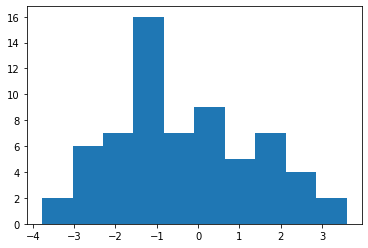

In [13]:
## graph the distribution of man_advantage_per_10min
import matplotlib.pyplot as plt

plt.hist(summary_df['man_advantage_per_10min'])


In [5]:
player_data_filtered.head()

,id,game_id,player_id,player_tag,stats,created_at,updated_at,deleted_at,match_id,kills,...,hp_bp_rating,snd_bp_rating,ctl_bp_rating,bp_rating,ctl_attack_rounds,ctl_defense_rounds,document.id,game_no,player_no,start_date
80,1f31c4c5-f189-447e-9424-21e30dca1ec8,c2277fdb-ee17-4ba0-8733-26c9e0aa9799,29,Simp,NaN,2023-12-15T19:49:46.542Z,2023-12-15T19:49:46.542Z,NaN,27202,18,...,1.015035,0.0,0.0,1.015035,NaN,NaN,NaN,NaN,NaN,NaN
81,a41d8d7c-fe0b-4e9c-b0cb-77f7f7f3713d,c2277fdb-ee17-4ba0-8733-26c9e0aa9799,4,Afro,NaN,2023-12-15T19:49:46.542Z,2023-12-15T19:49:46.542Z,NaN,27202,11,...,0.588085,0.0,0.0,0.588085,NaN,NaN,NaN,NaN,NaN,NaN
82,db89d9f2-5528-4bb3-becf-974c038d2bde,c2277fdb-ee17-4ba0-8733-26c9e0aa9799,7,Cammy,NaN,2023-12-15T19:49:46.542Z,2023-12-15T19:49:46.542Z,NaN,27202,17,...,0.921220,0.0,0.0,0.921220,NaN,NaN,NaN,NaN,NaN,NaN
83,4b07c0ad-dbcb-4023-8b38-0e0801308bf4,c2277fdb-ee17-4ba0-8733-26c9e0aa9799,40,Ghosty,NaN,2023-12-15T19:49:46.542Z,2023-12-15T19:49:46.542Z,NaN,27202,22,...,1.177516,0.0,0.0,1.177516,NaN,NaN,NaN,NaN,NaN,NaN
84,748d0ed2-945d-4903-9884-8b467ead93e9,c2277fdb-ee17-4ba0-8733-26c9e0aa9799,55,JoeDeceives,NaN,2023-12-15T19:49:46.542Z,2023-12-15T19:49:46.542Z,NaN,27202,19,...,0.979845,0.0,0.0,0.979845,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
## read in D:\ANALYTICS\COD\bp_data\past\players\all_player_data.csv
data_player = pd.read_csv('D:/ANALYTICS/COD/bp_data/past/players/all_player_data.csv')

In [22]:
data_player.columns

Index(['id', 'game_id', 'player_id', 'player_tag', 'stats', 'created_at',
       'updated_at', 'deleted_at', 'match_id', 'kills', 'deaths', 'damage',
       'team_id', 'assists', 'non_traded_kills', 'highest_streak', 'hill_time',
       'contested_hill_time', 'first_blood_count', 'plant_count',
       'defuse_count', 'zone_capture_count', 'zone_tier_capture_count',
       'spreadsheet_identifier', 'first_death_count', 'snipe_count',
       'one_v_one_win_count', 'one_v_two_win_count', 'one_v_three_win_count',
       'one_v_four_win_count', 'snd_rounds', 'gametime_min', 'gametime_sec',
       'event_id', 'mode_id', 'datetime', 'map_id', 'event_type', 'season_id',
       'hp_bp_rating', 'snd_bp_rating', 'ctl_bp_rating', 'bp_rating',
       'ctl_attack_rounds', 'ctl_defense_rounds'],
      dtype='object')

In [31]:
## filter to year == 2023
data_player_2023 = data_player[(data_player['mode_id'] == 1)]


## group by map_id, game_id, gametime_sec, gametime_min, and get sum of kills
data_player_2023 = data_player_2023.groupby(['season_id', 'map_id', 'game_id', 'gametime_sec', 'gametime_min']).agg({'kills': 'sum'}).reset_index()

## get full gametime in seconds
data_player_2023['gametime'] = data_player_2023['gametime_min'] * 60 + data_player_2023['gametime_sec']

# Calculate kills per minute (kpm)
data_player_2023['kpm'] = data_player_2023['kills'] / (data_player_2023['gametime'] / 60)

# Aggregate the mean of kpm
data_player_2023 = data_player_2023.groupby(['season_id', 'map_id']).agg({'kpm': 'mean'}).reset_index()

data_player_2023

,season_id,map_id,kpm
0,2021,16,17.818191
1,2021,17,16.188180
2,2021,18,20.748502
3,2021,19,17.332402
4,2021,20,18.659903
5,2021,21,17.085421
6,2022,25,17.583702
7,2022,26,19.182839
8,2022,27,17.986524
9,2022,29,20.737362


In [38]:
## filter to year == 2023
data_player_2023 = data_player[(data_player['mode_id'] == 1) & (data_player['map_id'] == 29)]


## group by map_id, game_id, gametime_sec, gametime_min, and get sum of kills
data_player_2023 = data_player_2023.groupby(['season_id', 'map_id', 'game_id', 'gametime_sec', 'gametime_min']).agg({'kills': 'sum'}).reset_index()

## get full gametime in seconds
data_player_2023['gametime'] = data_player_2023['gametime_min'] * 60 + data_player_2023['gametime_sec']

# Calculate kills per minute (kpm)
data_player_2023['kpm'] = data_player_2023['kills'] / (data_player_2023['gametime'] / 60)

data_player_2023[data_player_2023["kpm"] > 22.7]

,season_id,map_id,game_id,gametime_sec,gametime_min,kills,gametime,kpm
16,2022,29,38702542-347f-4d75-9551-a067835ae387,12,11,257,672,22.946429
48,2022,29,93519d06-a9e5-4b21-9b16-dd53018fc869,58,10,265,658,24.164134


In [28]:
data_player_2023.head()

,map_id,game_id,gametime_sec,gametime_min,kills
0,8,046d3167-18ab-40e0-b704-6bae7e444d41,48,9,164
1,8,08886198-3b6c-40e9-b0bd-4403d8d54252,12,9,184
2,8,0c4a2382-99f9-458f-a30a-acec144c6a78,10,10,196
3,8,0db6eaac-ea0e-4b02-9f26-90f11557cfa9,42,10,190
4,8,115a448e-7f83-45e3-8e3e-90a3d00b4f12,55,7,141
